# Imports

In [25]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

from os.path import expanduser

# Load data

In [5]:
df = pd.read_csv(expanduser("~/database/aita/dot/dot_2016_2019.csv"), sep="\t")

# Analysis

In [6]:
df.head()

,origin,destination,year,month,passengers,seats
0,HNL,PPG,2016,2,0,0
1,PPG,HNL,2016,2,0,0
2,MYR,NEW,2016,2,0,0
3,ANC,FAI,2016,2,1,4
4,ANC,TKJ,2016,2,3,8


# Combine markets into unordered markets

In [7]:
df['market'] = df.apply(lambda row: '_'.join(sorted([row['origin'], row['destination']])), axis=1)
df_unordered = df.groupby(['market', 'year', 'month'], as_index=False).agg({'passengers': 'sum', 'seats': 'sum'})

In [8]:
df_unordered.head()

,market,year,month,passengers,seats
0,05A_AET,2019,7,0,9
1,05A_AKP,2018,2,0,9
2,05A_AKP,2019,3,0,9
3,05A_AKP,2019,7,1,9
4,05A_ANC,2016,6,1,9


## Total amount of markets

In [10]:
df_unordered[["market"]].nunique()

market    31659
dtype: int64

In [45]:
# Add a column to indicate months with non-zero passengers
df_unordered['non_zero_passengers'] = df_unordered['passengers'] > 0

# Count the number of months with non-zero passengers for each market
market_month_counts = df_unordered.groupby('market')['non_zero_passengers'].sum()

# Filter markets with exactly 48 months of non-zero passengers
cool_markets = market_month_counts[market_month_counts == 48].index.tolist()

In [46]:
len(cool_markets)

2595

* markets which have amount of passengers greater then zero for each month are cool markets

In [47]:
df_cool = df_unordered[df_unordered['market'].isin(cool_markets)]

In [48]:
df_cool.shape

(124560, 6)

In [49]:
df_cool.head()

,market,year,month,passengers,seats,non_zero_passengers
118,1G4_1G4,2016,1,516,781,True
119,1G4_1G4,2016,2,1245,1591,True
120,1G4_1G4,2016,3,1095,1549,True
121,1G4_1G4,2016,4,751,1285,True
122,1G4_1G4,2016,5,959,2050,True


# Histogram of mean PPM (passengers per month)

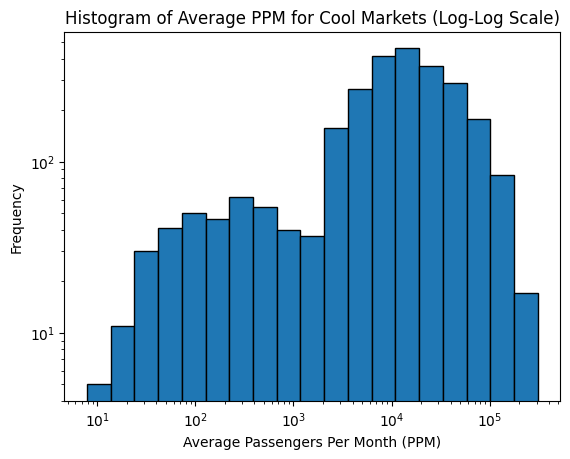

In [50]:
# Calculate average passengers per month (PPM) for each market
df_mean = df_cool.groupby('market', as_index=False)['passengers'].mean()
df_mean.rename(columns={'passengers': 'PPM'}, inplace=True)

min_val = df_mean['PPM'].min()
max_val = df_mean['PPM'].max()
bins = np.logspace(np.log10(min_val), np.log10(max_val), num=20)

# Plot histogram with logarithmic bins
plt.hist(df_mean['PPM'], bins=bins, edgecolor='black', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Average Passengers Per Month (PPM)')
plt.ylabel('Frequency')
plt.title('Histogram of Average PPM for Cool Markets (Log-Log Scale)')
plt.show()

* roughly set thresholds for PPM
  * 0 - 1000 - small
  * 1000 - 10000 - medium
  * \> 10000 - big

# Check some small markets

In [51]:
df_small = df_mean[df_mean['PPM'] <= 1000]
df_medium = df_mean[(df_mean['PPM'] > 1000) & (df_mean['PPM'] <= 10000)]
df_big = df_mean[df_mean['PPM'] > 10000]

In [52]:
df_whole_small = df_cool[df_cool['market'].isin(df_small['market'])]
df_whole_medium = df_cool[df_cool['market'].isin(df_medium['market'])]
df_whole_big = df_cool[df_cool['market'].isin(df_big['market'])]

# Small markets

In [53]:
df_small = df_small.sort_values(by='PPM', ascending=True)
df_medium = df_medium.sort_values(by='PPM', ascending=True)
df_big = df_big.sort_values(by='PPM', ascending=True)

In [58]:
df_small.shape

(328, 2)

In [54]:
df_small.head()

,market,PPM
2581,SLQ_SRV,7.854167
404,BET_EHM,11.166667
71,AKN_IGG,12.104167
1820,ILI_PTA,12.395833
781,CHU_CKD,13.479167


In [59]:
df_small.tail()

,market,PPM
2113,LUK_MDW,933.687500
2011,LAX_MCE,955.270833
104,ANC_CDB,958.020833
92,ALS_DEN,964.937500
1501,FAI_SCC,974.041667


In [60]:
df_small.tail(n=70).head()

,market,PPM
408,BET_KKH,461.916667
625,BRL_STL,464.937500
1580,GAM_OME,467.145833
1426,ESD_FRD,468.312500
422,BET_NUP,473.250000


In [61]:
df_small.tail(n=180).head()

,market,PPM
1903,JNU_TKE,143.729167
132,ANI_BET,147.291667
1945,KUK_NUP,150.770833
1709,HSL_TAL,155.020833
1491,FAI_HUS,157.708333


* small markets to work with
  * JNU_TKE
  * GAM_OME
  * ANC_CDB	

# Plot

In [64]:
jnu_tke_data = df[df['market'] == 'JNU_TKE']

In [65]:
jnu_tke_data

,origin,destination,year,month,passengers,seats,market
1872,JNU,TKE,2016,5,29,100,JNU_TKE
1873,JNU,TKE,2016,5,16,35,JNU_TKE
1911,TKE,JNU,2016,5,102,236,JNU_TKE
1912,TKE,JNU,2016,5,22,56,JNU_TKE
5323,JNU,TKE,2016,12,4,11,JNU_TKE
...,...,...,...,...,...,...,...
892211,TKE,JNU,2019,12,51,117,JNU_TKE
900042,JNU,TKE,2019,11,35,81,JNU_TKE
908746,TKE,JNU,2019,11,59,126,JNU_TKE
1059313,JNU,TKE,2016,6,55,142,JNU_TKE


In [66]:
# Filter the data for the JNU_TKE market
jnu_tke_data = df_unordered[df_unordered['market'] == 'JNU_TKE']

# Group by year and month, summing passengers
jnu_tke_monthly_passengers = jnu_tke_data.groupby(['year', 'month'])['passengers'].sum()

In [67]:
jnu_tke_monthly_passengers

year  month
2016  1         72
      2         77
      3         79
      4        109
      5        169
      6        201
      7        200
      8        333
      9        227
      10       142
      11       116
      12        62
2017  1         41
      2         41
      3         36
      4        113
      5        185
      6        196
      7        313
      8        271
      9        141
      10       133
      11        77
      12        82
2018  1         69
      2         58
      3         80
      4         93
      5        193
      6        218
      7        261
      8        248
      9        172
      10       109
      11       140
      12        69
2019  1         49
      2         30
      3         51
      4        102
      5        196
      6        164
      7        253
      8        283
      9        196
      10       143
      11       169
      12       137
Name: passengers, dtype: int64

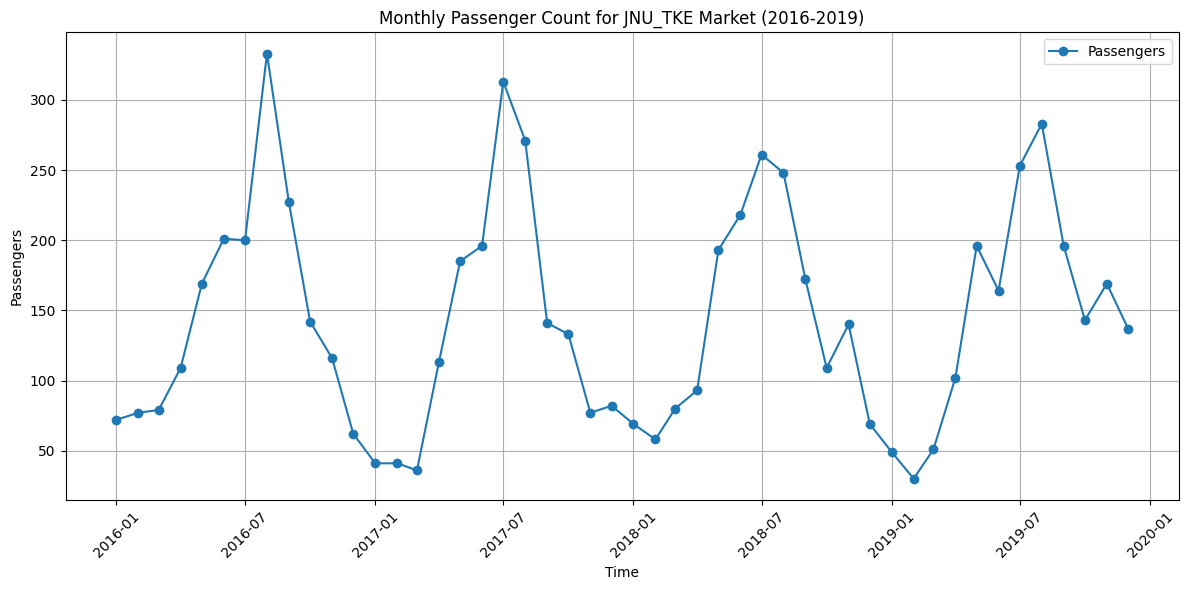

In [68]:
# Prepare the data for plotting
jnu_tke_monthly_passengers.index = pd.to_datetime(jnu_tke_monthly_passengers.index.map(lambda x: f"{x[0]}-{x[1]}-01"))
jnu_tke_monthly_passengers = jnu_tke_monthly_passengers.sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(jnu_tke_monthly_passengers.index, jnu_tke_monthly_passengers.values, marker='o', linestyle='-', label='Passengers')
plt.title('Monthly Passenger Count for JNU_TKE Market (2016-2019)')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()